# Fifa Player Recommendation System

##  Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
import missingno as mn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix  
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
df=pd.read_csv("kl.csv", encoding='latin1')

In [3]:
df.shape

(18207, 89)

In [4]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## Data Preprocessing

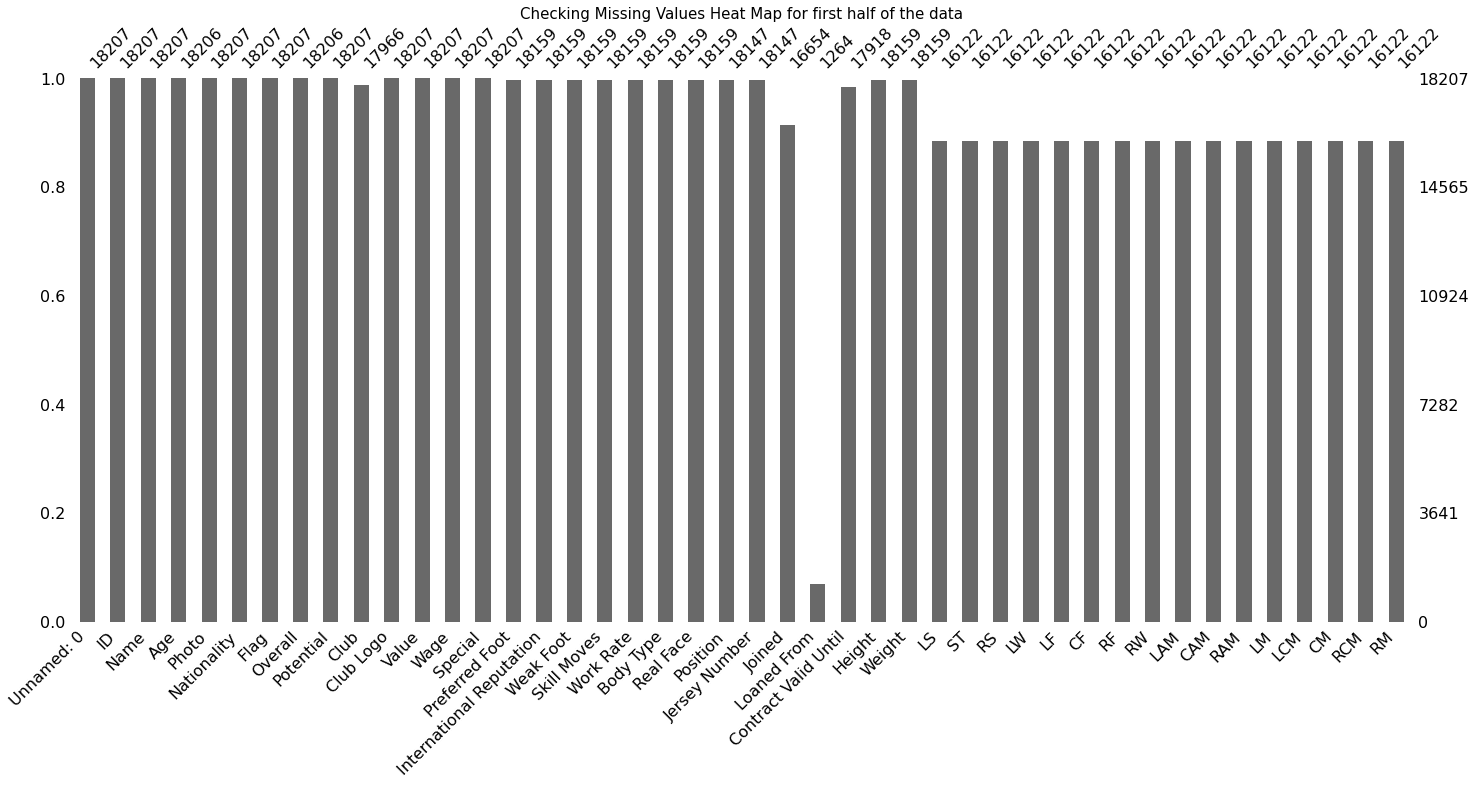

In [6]:
#Missing values in dataset
mn.bar(df.iloc[:, :44]) 
plt.title('Checking Missing Values Heat Map for first half of the data', fontsize = 15)
plt.show()

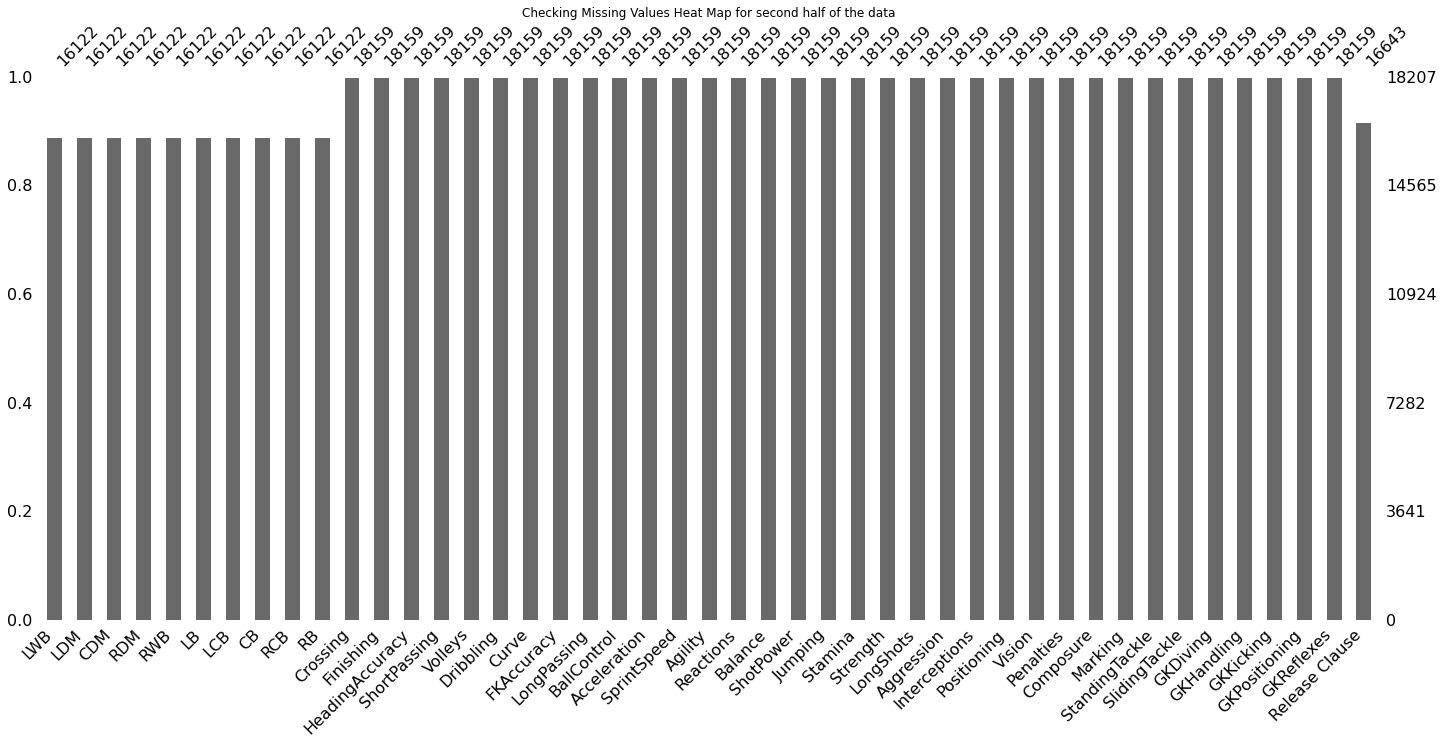

In [7]:
#Missing values in dataset
mn.bar(df.iloc[:, 44:]) 
plt.title('Checking Missing Values Heat Map for second half of the data')
plt.show()

In [8]:
#Fill null values with mean of each attribute
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [9]:
#Check null values
pd.set_option('max_rows', 100)
df.isnull().sum()

Unnamed: 0                     0
ID                             0
Name                           0
Age                            1
Photo                          0
Nationality                    0
Flag                           0
Overall                        1
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                     48
Position                       0
Jersey Number                  0
Joined                         0
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
LS                          2085
ST                          2085
RS        

In [10]:
#Fill remaining null values with 0
df.fillna(0, inplace = True)
df.isnull().sum().sum()

0

In [11]:
#Deriving various new attributes of a player depending on given attributes
def defending(df):
    return int(round((df[['Marking', 'StandingTackle', 'SlidingTackle']].mean()).mean()))

def general(df):
    return int(round((df[['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].mean()).mean()))

def mental(df):
    return int(round((df[['Aggression', 'Interceptions', 'Positioning', 'Vision','Composure']].mean()).mean()))

def passing(df):
    return int(round((df[['Crossing', 'ShortPassing', 'LongPassing']].mean()).mean()))

def mobility(df):
    return int(round((df[['Acceleration', 'SprintSpeed', 'Agility','Reactions']].mean()).mean()))
def power(df):
    return int(round((df[['Balance', 'Jumping', 'Stamina', 'Strength']].mean()).mean()))

def rating(df):
    return int(round((df[['Potential', 'Overall']].mean()).mean()))

def shooting(df):
    return int(round((df[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower','LongShots', 'Penalties']].mean()).mean()))


In [12]:
#Create columns in dataset with the new functions/attricutes defined above
df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

In [13]:
# Extra copy
df2=df
df2.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## Data Visualizations

C:\Users\Pratham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pratham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pratham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

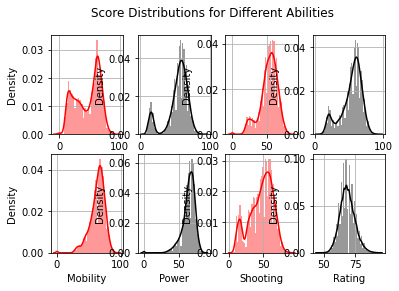

In [14]:
#plots distributions for new attributes
plt.subplot(2, 4, 1)
sns.distplot(df['Defending'], color = 'red')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(df['General'], color = 'black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(df['Mental'], color = 'red')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(df['Passing'], color = 'black')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(df['Mobility'], color = 'red')
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(df['Power'], color = 'black')
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(df['Shooting'], color = 'red')
plt.grid()

plt.subplot(2, 4, 8)
sns.distplot(df['Rating'], color = 'black')
plt.grid()

plt.suptitle('Score Distributions for Different Abilities')
plt.show()

C:\Users\Pratham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


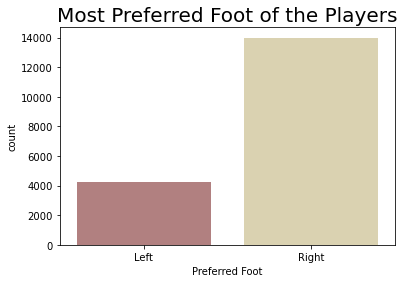

In [15]:
#Check preferred foot of players
sns.countplot(df['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

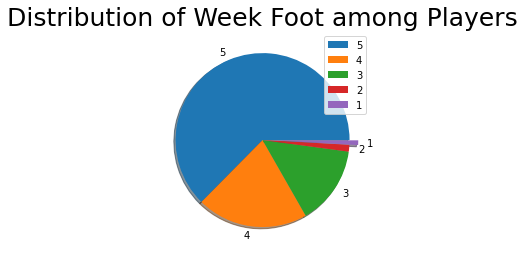

In [16]:
#Check weak foot for each player
labels = ['5', '4', '3', '2', '1'] 
size = df['Weak Foot'].value_counts()
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, explode = explode, shadow = True)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()

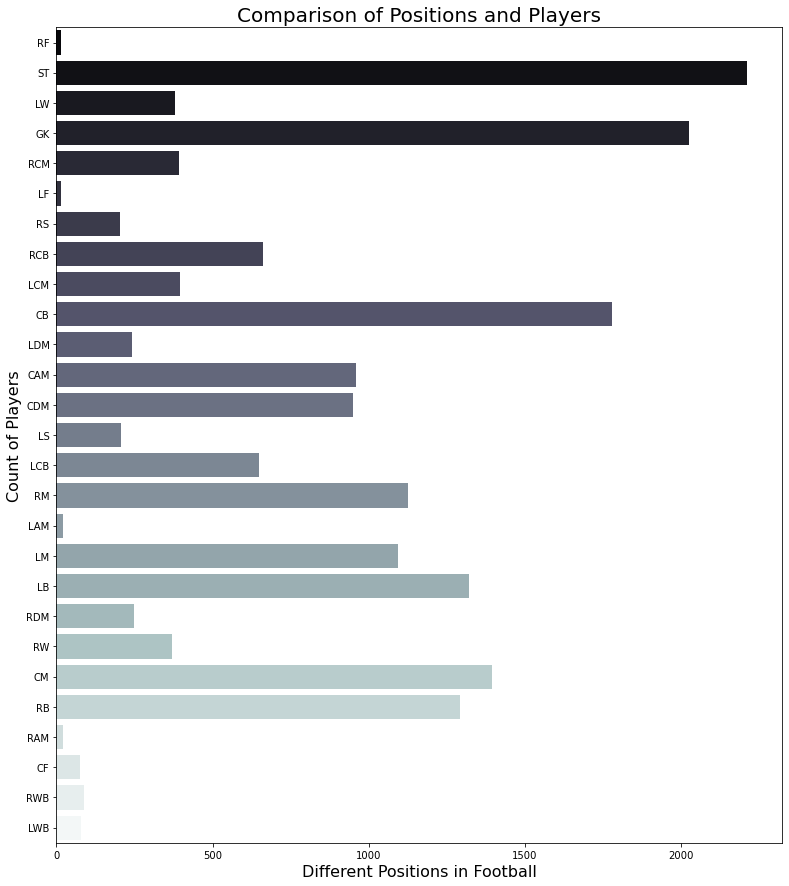

In [17]:
#Count number of players for each position
plt.figure(figsize = (13, 15))
ax = sns.countplot(y = 'Position', data = df, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [18]:
#define value of each plyer to same range
def extract_value_from(column):
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in column:
        out = float(out.replace('K', ''))*1000
    return float(out)

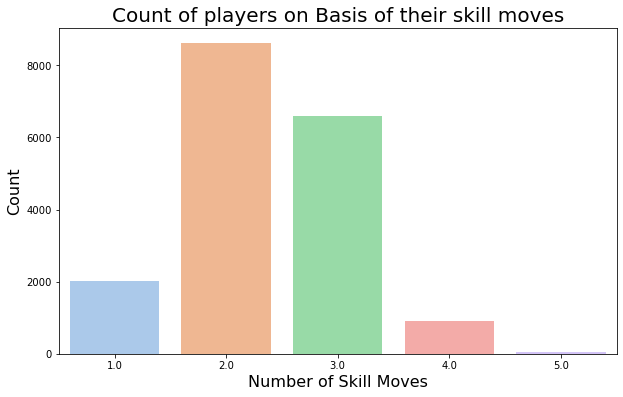

In [19]:
# Count skill potential of players
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Skill Moves', data = df, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

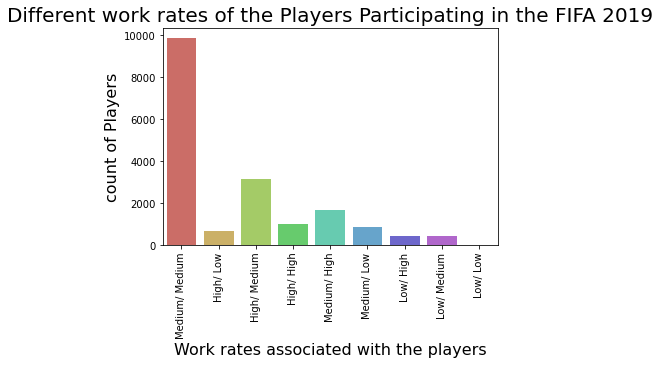

In [20]:
#Examine work rates of players (Attack workrate/Defencework rate)
sns.countplot(x = 'Work Rate', data = df, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

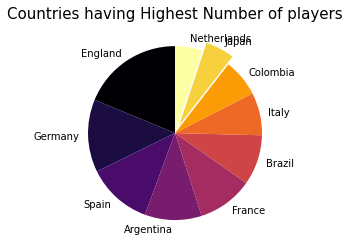

In [21]:
#Check nationality of players
df['Nationality'].value_counts().head(10).plot(kind = 'pie', cmap = 'inferno', startangle = 90, explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0])
plt.title('Countries having Highest Number of players', fontsize = 15)
plt.axis('off')
plt.show()

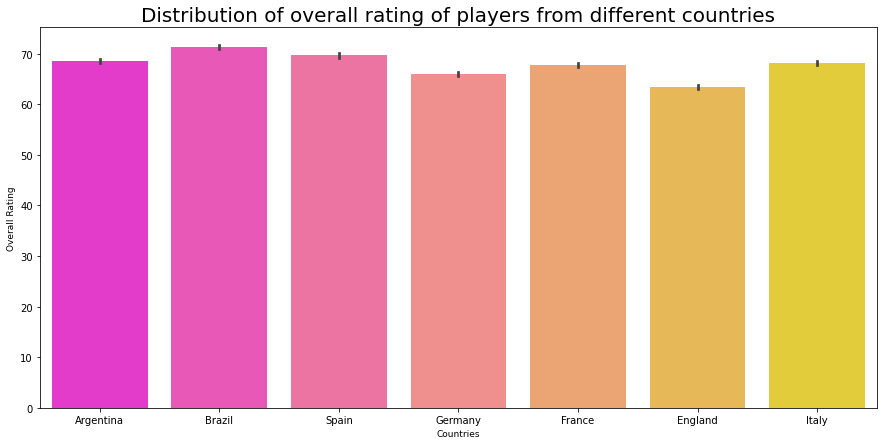

In [22]:
#Plot country v/s rating graph
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = df.loc[df['Nationality'].isin(some_countries) & df['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Rating', fontsize = 9)
ax.set_title(label = 'Distribution of overall rating of players from different countries', fontsize = 20)
plt.show()

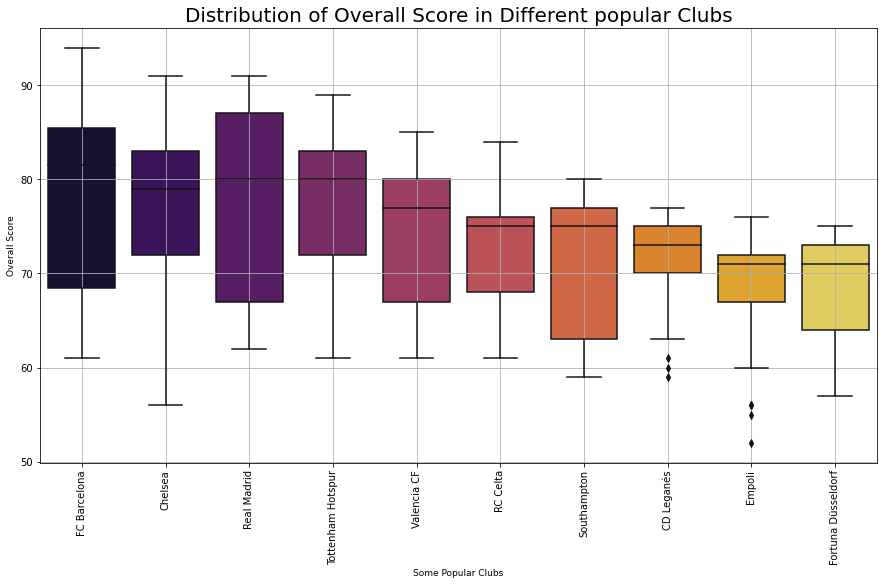

In [23]:
#Box plots of overall rating of players from some clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City', 'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_clubs = df.loc[df['Club'].isin(some_clubs) & df['Overall']]
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

## Creating Desired Conditions for Recommending new positions for a player

In [24]:
#
def Defending1(df):
        if(df['Marking']>70 and df['StandingTackle']>70 and df['SlidingTackle']>70):
            return 1
        else:
            return 0
def General1(df):
        if(df['HeadingAccuracy']>0 and df['Dribbling']>70 and df['Curve']>70 and df['BallControl']>70):
            return 1
        else:
            return 0
def Mental1(df):
        if(df['Aggression']>70 and df['Interceptions']>70 and df['Positioning']>70 and df['Vision']>70 and df['Composure']>70):
            return 1
        else:
            return 0
def Passing1(df):
        if(df['Crossing']>70 and df['ShortPassing']>70 and df['LongPassing']>70):
            return 1
        else:
            return 0
def Mobility1(df):
        if(df['Acceleration']>70 and df['SprintSpeed']>70 and df['Agility']>70 and df['Reactions']>70):
            return 1
        else:
            return 0
def Power1(df):
        if(df['Balance']>70 and df['Jumping']>70 and df['Stamina']>70 and df['Strength']>70):
            return 1
        else:
            return 0
def Shooting1(df):
        if(df['Finishing']>70 and df['Volleys']>70 and df['FKAccuracy']>70 and df['ShotPower']>70 and df['LongShots']>70 and df['Penalties']>70):
             return 1
        else:
            return 0

In [25]:
df['Defending1'] = df.apply(Defending1, axis = 1)
df['General1'] = df.apply(General1, axis = 1)
df['Mental1'] = df.apply(Mental1, axis = 1)
df['Passing1'] = df.apply(Passing1, axis = 1)
df['Mobility1'] = df.apply(Mobility1, axis = 1)
df['Power1'] = df.apply(Power1, axis = 1)
df['Shooting1'] = df.apply(Shooting1, axis = 1)

In [26]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club',
       ...
       'Power', 'Rating', 'Shooting', 'Defending1', 'General1', 'Mental1',
       'Passing1', 'Mobility1', 'Power1', 'Shooting1'],
      dtype='object', length=104)

In [27]:
def RB1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and df['Mobility1']==1 and (df['Preferred Foot']=='Left' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def LB1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and df['Mobility1']==1 and (df['Preferred Foot']=='Right' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def RWB1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and df['Mobility1']==1 and (df['Preferred Foot']=='Left' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def LWB1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and df['Mobility1']==1 and (df['Preferred Foot']=='Right' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def CB1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1):
            return 1
        else:
            return 0
def RCB1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and (df['Preferred Foot']=='Left' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def LCB1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and (df['Preferred Foot']=='Right' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def CDM1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and df['Passing1']>70):
            return 1
        else:
            return 0
def RDM1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and df['Passing1']==1 and (df['Preferred Foot']=='Left' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def LDM1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and df['Passing1']==1 and (df['Preferred Foot']=='Right' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def CM1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and df['Passing1']==1 and df['General1']==1):
            return 1
        else:
            return 0
def RCM1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and df['Passing1']==1 and df['General1']==1 and (df['Preferred Foot']=='Left' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def LCM1(df):
        if(df['Defending1']==1 and df['Mental1']==1 and df['Power1']==1 and df['Passing1']==1 and df['General1']==1 and (df['Preferred Foot']=='Right' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def RM1(df):
        if(df['Shooting1']==1 and df['Mobility1']==1 and df['Power1']==1 and df['Passing1']==1 and df['General1']==1 and (df['Preferred Foot']=='Left' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def LM1(df):
        if(df['Shooting1']==1 and df['Mobility1']==1 and df['Power1']==1 and df['Passing1']==1 and df['General1']==1 and (df['Preferred Foot']=='Right' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def CAM1(df):
        if(df['Shooting1']==1 and df['Mobility1']==1 and df['Power1']==1 and df['Passing1']==1 and df['General1']==1 and df['Mental1']==1):
            return 1
        else:
            return 0
def RAM1(df):
        if(df['Shooting1']==1 and df['Mobility1']==1 and df['Power1']==1 and df['Passing1']==1 and df['General1']==1 and df['Mental1']==1 and (df['Preferred Foot']=='Left' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def LAM1(df):
        if(df['Shooting1']==1 and df['Mobility1']==1 and df['Power1']==1 and df['Passing1']==1 and df['General1']==1 and df['Mental1']==1 and (df['Preferred Foot']=='Right' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def RW1(df):
        if(df['Mobility1']==1 and df['Passing1']==1 and df['General1']==1 and (df['Preferred Foot']=='Left' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def LW1(df):
        if(df['Mobility1']==1 and df['Passing1']==1 and df['General1']==1 and (df['Preferred Foot']=='Right' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def RF1(df):
        if(df['Shooting1']==1 and df['Mobility1']==1 and df['Passing1']==1 and df['General1']==1 and (df['Preferred Foot']=='Left' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def LF1(df):
        if(df['Shooting1']==1 and df['Mobility1']==1 and df['Passing1']==1 and df['General1']==1 and (df['Preferred Foot']=='Right' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def CF1(df):
        if(df['Shooting1']==1 and df['Mobility1']==1 and df['Passing1']==1 and df['General1']==1):
            return 1
        else:
            return 0
def ST1(df):
        if(df['Shooting1']==1 and df['Power1']==1 and df['General1']==1):
            return 1
        else:
            return 0
def RS1(df):
        if(df['Shooting1']==1 and df['Power1']==1 and df['Passing1']==1 and df['General1']==1 and (df['Preferred Foot']=='Left' or df['Weak Foot']>3)):
            return 1
        else:
            return 0
def LS1(df):
        if(df['Shooting1']==1 and df['Power1']==1 and df['Passing1']==1 and df['General1']==1 and (df['Preferred Foot']=='Right' or df['Weak Foot']>3)):
            return 1
        else:
            return 0

In [28]:
df['RB1'] = df.apply(RB1, axis = 1)
df['LB1'] = df.apply(LB1, axis = 1)
df['RWB1'] = df.apply(RWB1, axis = 1)
df['LWB1'] = df.apply(LWB1, axis = 1)
df['RCB1'] = df.apply(RCB1, axis = 1)
df['LCB1'] = df.apply(LCB1, axis = 1)
df['CB1'] = df.apply(CB1, axis = 1)
df['RDM1'] = df.apply(RDM1, axis = 1)
df['LDM1'] = df.apply(LDM1, axis = 1)
df['CDM1'] = df.apply(CDM1, axis = 1)
df['CM1'] = df.apply(CM1, axis = 1)
df['RCM1'] = df.apply(RCM1, axis = 1)
df['LCM1'] = df.apply(LCM1, axis = 1)
df['CAM1'] = df.apply(CAM1, axis = 1)
df['RAM1'] = df.apply(RAM1, axis = 1)
df['LAM1'] = df.apply(LAM1, axis = 1)
df['RW1'] = df.apply(RW1, axis = 1)
df['LW1'] = df.apply(LW1, axis = 1)
df['CF1'] = df.apply(CF1, axis = 1)
df['ST1'] = df.apply(ST1, axis = 1)
df['RS1'] = df.apply(RS1, axis = 1)
df['LS1'] = df.apply(LS1, axis = 1)
df['RF1'] = df.apply(RF1, axis = 1)
df['LF1'] = df.apply(LF1, axis = 1)

In [29]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club',
       ...
       'RAM1', 'LAM1', 'RW1', 'LW1', 'CF1', 'ST1', 'RS1', 'LS1', 'RF1', 'LF1'],
      dtype='object', length=128)

In [30]:
result=df.iloc[:,-24:]

In [31]:
result.columns

Index(['RB1', 'LB1', 'RWB1', 'LWB1', 'RCB1', 'LCB1', 'CB1', 'RDM1', 'LDM1',
       'CDM1', 'CM1', 'RCM1', 'LCM1', 'CAM1', 'RAM1', 'LAM1', 'RW1', 'LW1',
       'CF1', 'ST1', 'RS1', 'LS1', 'RF1', 'LF1'],
      dtype='object')

In [32]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RB1     18207 non-null  int64
 1   LB1     18207 non-null  int64
 2   RWB1    18207 non-null  int64
 3   LWB1    18207 non-null  int64
 4   RCB1    18207 non-null  int64
 5   LCB1    18207 non-null  int64
 6   CB1     18207 non-null  int64
 7   RDM1    18207 non-null  int64
 8   LDM1    18207 non-null  int64
 9   CDM1    18207 non-null  int64
 10  CM1     18207 non-null  int64
 11  RCM1    18207 non-null  int64
 12  LCM1    18207 non-null  int64
 13  CAM1    18207 non-null  int64
 14  RAM1    18207 non-null  int64
 15  LAM1    18207 non-null  int64
 16  RW1     18207 non-null  int64
 17  LW1     18207 non-null  int64
 18  CF1     18207 non-null  int64
 19  ST1     18207 non-null  int64
 20  RS1     18207 non-null  int64
 21  LS1     18207 non-null  int64
 22  RF1     18207 non-null  int64
 23  LF1     182

In [33]:
li=[]
li2=[]
for j in range(1,20):
    re=result.iloc[(j-1):j,:]
    for i in re.columns:
        if(re[i].values==1):
            li.append(i)
    li2.append(li)
    li=[]
pd.Series(li2)

0     [RW1, LW1, CF1, RF1, LF1]
1     [RW1, LW1, CF1, RF1, LF1]
2     [RW1, LW1, CF1, RF1, LF1]
3                            []
4     [RW1, LW1, CF1, RF1, LF1]
5     [RW1, LW1, CF1, RF1, LF1]
6     [RW1, LW1, CF1, RF1, LF1]
7                            []
8                            []
9                            []
10                        [ST1]
11                           []
12                           []
13                           []
14       [LB1, LWB1, LCB1, CB1]
15              [RW1, CF1, RF1]
16                           []
17              [RW1, CF1, RF1]
18                           []
dtype: object

In [34]:
df['Allternate Positions'] = pd.Series(li2)

In [35]:
df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,LAM1,RW1,LW1,CF1,ST1,RS1,LS1,RF1,LF1,Allternate Positions
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,0,1,1,1,0,0,0,1,1,"[RW1, LW1, CF1, RF1, LF1]"
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,0,1,1,1,0,0,0,1,1,"[RW1, LW1, CF1, RF1, LF1]"
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,0,1,1,1,0,0,0,1,1,"[RW1, LW1, CF1, RF1, LF1]"
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,0,0,0,0,0,0,0,0,0,[]
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,0,1,1,1,0,0,0,1,1,"[RW1, LW1, CF1, RF1, LF1]"
5,5,183277,E. Hazard,27.0,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,91,Chelsea,...,0,1,1,1,0,0,0,1,1,"[RW1, LW1, CF1, RF1, LF1]"
6,6,177003,L. Modri?,32.0,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91.0,91,Real Madrid,...,0,1,1,1,0,0,0,1,1,"[RW1, LW1, CF1, RF1, LF1]"
7,7,176580,L. Suárez,31.0,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91.0,91,FC Barcelona,...,0,0,0,0,0,0,0,0,0,[]
8,8,155862,Sergio Ramos,32.0,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,91,Real Madrid,...,0,0,0,0,0,0,0,0,0,[]
9,9,200389,J. Oblak,25.0,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90.0,93,Atlético Madrid,...,0,0,0,0,0,0,0,0,0,[]


In [36]:
Exp=df['Position']=='ST'
df1=pd.DataFrame(df[Exp])

In [37]:
df1.drop(columns=['Unnamed: 0','Age','ID','Name','Preferred Foot','Photo','Nationality','Work Rate','Flag','Potential','Club','Club Logo','Value','Wage','Special','International Reputation','Body Type','Real Face','Position','Jersey Number','Joined','Loaned From','Contract Valid Until','Contract Valid Until','Height','Weight','Release Clause','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','Allternate Positions'],inplace=True)

In [38]:
df1

,Overall,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,RAM1,LAM1,RW1,LW1,CF1,ST1,RS1,LS1,RF1,LF1
1,94.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,0,0,1,1,1,0,0,0,1,1
10,90.0,4.0,4.0,62.0,91.0,85.0,83.0,89.0,85.0,77.0,...,0,0,0,0,0,1,0,0,0,0
16,89.0,4.0,3.0,75.0,94.0,85.0,80.0,84.0,80.0,78.0,...,0,0,0,0,0,0,0,0,0,0
23,89.0,4.0,4.0,70.0,93.0,77.0,81.0,85.0,89.0,82.0,...,0,0,0,0,0,1,0,0,0,0
36,88.0,3.0,4.0,87.0,86.0,84.0,85.0,85.0,87.0,90.0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,48.0,3.0,2.0,32.0,53.0,45.0,37.0,35.0,44.0,39.0,...,0,0,0,0,0,0,0,0,0,0
18189,47.0,3.0,2.0,37.0,48.0,30.0,45.0,43.0,50.0,41.0,...,0,0,0,0,0,0,0,0,0,0
18200,47.0,2.0,2.0,28.0,47.0,47.0,42.0,37.0,39.0,32.0,...,0,0,0,0,0,0,0,0,0,0
18203,47.0,2.0,2.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,...,0,0,0,0,0,0,0,0,0,0


## Training models to test Accuracy

In [39]:
#Train test split
X=df1.iloc[:,:]
Y=df1.iloc[:,1:2]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.1)

In [40]:
#Standardize data  
st_X= StandardScaler()    
X_train= st_X.fit_transform(X_train)    
X_test= st_X.transform(X_test)

### K-Nearest Neighbours

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

# Train the model using the training set
knn.fit(X_train, Y_train)

# Make predictions on the testing set
Y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7387387387387387


C:\Users\Pratham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Random Forest Classifier

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)

accuracy = rf.score(X_test, Y_test)
print("Accuracy:", accuracy)

<ipython-input-42-42ff2b38ff9c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


Accuracy: 0.954954954954955


### Support Vector Classifier

In [44]:
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, Y_train) 
Y_pred= classifier.predict(X_test)
cm= confusion_matrix(Y_test,Y_pred)  
print(accuracy_score(Y_test,Y_pred))

0.9954954954954955


C:\Users\Pratham\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
